In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
for column in calls.columns:
    print(column)
    print(calls[column].unique())

id
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']
call_date
['2018-07-25' '2018-08-17' '2018-06-11' '2018-09-21' '2018-12-15'
 '2018-11-02' '2018-10-18' '2018-08-22' '2018-09-15' '2018-08-15'
 '2018-05-28' '2018-07-05' '2018-09-29' '2018-12-11' '2018-07-27'
 '2018-08-11' '2018-08-02' '2018-06-15' '2018-12-04' '2018-08-20'
 '2018-09-25' '2018-07-21' '2018-08-27' '2018-08-25' '2018-12-12'
 '2018-07-19' '2018-11-14' '2018-12-26' '2018-12-02' '2018-10-08'
 '2018-09-23' '2018-10-09' '2018-05-25' '2018-06-13' '2018-10-25'
 '2018-12-29' '2018-07-12' '2018-11-20' '2018-06-05' '2018-10-13'
 '2018-06-26' '2018-07-14' '2018-07-20' '2018-12-01' '2018-06-17'
 '2018-10-24' '2018-11-26' '2018-09-19' '2018-05-30' '2018-12-21'
 '2018-12-23' '2018-07-03' '2018-10-04' '2018-09-16' '2018-11-21'
 '2018-10-28' '2018-08-29' '2018-08-13' '2018-07-18' '2018-06-03'
 '2018-09-03' '2018-08-14' '2018-11-01' '2018-05-26' '2018-11-23'
 '2018-09-30' '2018-11-09' '2018-08-01' '2018-06-18' '2018-10-2

In [5]:
calls['id'].value_counts()

1000_0      1
1344_881    1
1344_883    1
1344_884    1
1344_885    1
           ..
1171_562    1
1171_563    1
1171_564    1
1171_565    1
1499_219    1
Name: id, Length: 202607, dtype: int64

In [6]:
calls['call_date'].value_counts()

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

In [7]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

In [8]:
calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [9]:
calls_under_min = calls.query('0 <duration< 0.99 ')

In [10]:
calls_under_min['duration'].value_counts().sort_values(ascending=False)

0.23    115
0.96    105
0.68    103
0.83    102
0.98    101
       ... 
0.21     67
0.11     67
0.53     64
0.52     63
0.14     63
Name: duration, Length: 98, dtype: int64

In [11]:
calls['duration'] = calls['duration'].apply(np.ceil)

<AxesSubplot: >

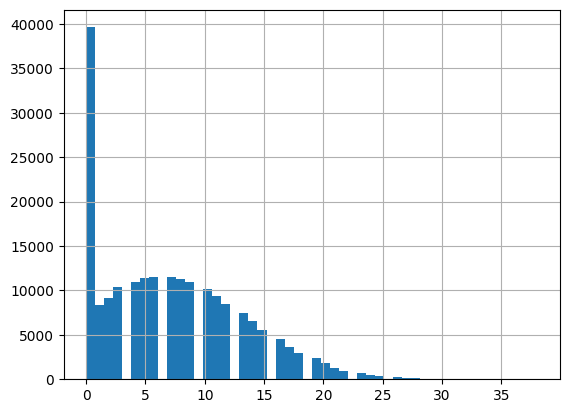

In [12]:
calls['duration'].hist(bins=50)

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

In [14]:
for column in messages.columns:
    print(column)
    print(messages[column].unique())

id
['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']
message_date
['2018-06-27' '2018-10-08' '2018-08-04' '2018-06-16' '2018-12-05'
 '2018-06-20' '2018-11-19' '2018-10-29' '2018-06-25' '2018-12-18'
 '2018-05-30' '2018-07-06' '2018-08-20' '2018-10-30' '2018-09-14'
 '2018-08-28' '2018-06-29' '2018-07-07' '2018-05-29' '2018-05-28'
 '2018-08-15' '2018-07-29' '2018-12-07' '2018-12-25' '2018-10-31'
 '2018-07-30' '2018-11-05' '2018-12-15' '2018-12-04' '2018-06-30'
 '2018-12-22' '2018-10-02' '2018-08-29' '2018-09-09' '2018-07-19'
 '2018-09-04' '2018-07-15' '2018-10-25' '2018-12-08' '2018-06-01'
 '2018-06-12' '2018-12-21' '2018-10-07' '2018-08-30' '2018-06-04'
 '2018-10-01' '2018-06-22' '2018-10-12' '2018-10-15' '2018-10-24'
 '2018-09-20' '2018-08-22' '2018-09-17' '2018-08-27' '2018-07-26'
 '2018-06-05' '2018-11-16' '2018-09-06' '2018-11-26' '2018-11-18'
 '2018-09-21' '2018-07-11' '2018-07-16' '2018-11-08' '2018-07-25'
 '2018-09-13' '2018-08-13' '2018-12-31' '2018-06-10' '2018-0

In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [18]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [19]:
for column in internet.columns:
    print(column)
    print(internet[column].unique())

Unnamed: 0
[     0      1      2 ... 149393 149394 149395]
id
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']
mb_used
[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]
session_date
['2018-11-25' '2018-09-07' '2018-06-25' '2018-08-22' '2018-09-24'
 '2018-10-02' '2018-07-11' '2018-10-08' '2018-09-03' '2018-09-27'
 '2018-08-28' '2018-06-20' '2018-08-09' '2018-08-11' '2018-07-21'
 '2018-06-09' '2018-06-03' '2018-11-01' '2018-11-28' '2018-08-20'
 '2018-12-06' '2018-07-02' '2018-10-19' '2018-10-30' '2018-06-17'
 '2018-11-06' '2018-09-14' '2018-11-15' '2018-08-26' '2018-10-15'
 '2018-11-27' '2018-10-17' '2018-10-07' '2018-08-05' '2018-07-06'
 '2018-10-03' '2018-11-02' '2018-06-30' '2018-11-17' '2018-06-06'
 '2018-11-20' '2018-05-31' '2018-10-29' '2018-12-10' '2018-07-04'
 '2018-12-28' '2018-05-28' '2018-09-15' '2018-09-09' '2018-09-17'
 '2018-09-01' '2018-11-03' '2018-11-04' '2018-06-16' '2018-12-07'
 '2018-08-25' '2018-06-15' '2018-06-26' '2018-10-06' '2018-12-01'
 '201

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

<AxesSubplot: >

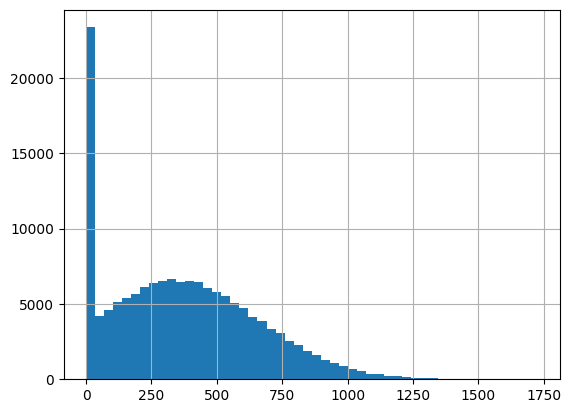

In [22]:
internet['mb_used'].hist(bins=50)

In [23]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

<AxesSubplot: >

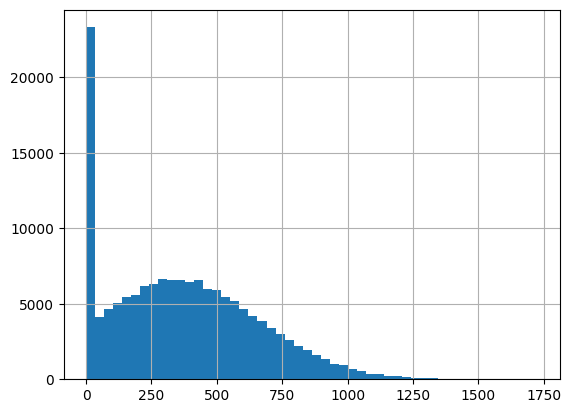

In [24]:
internet['mb_used'].hist(bins=50)

In [25]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


In [26]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)

In [27]:
internet['mb_used'].dropna(inplace=True)

<AxesSubplot: >

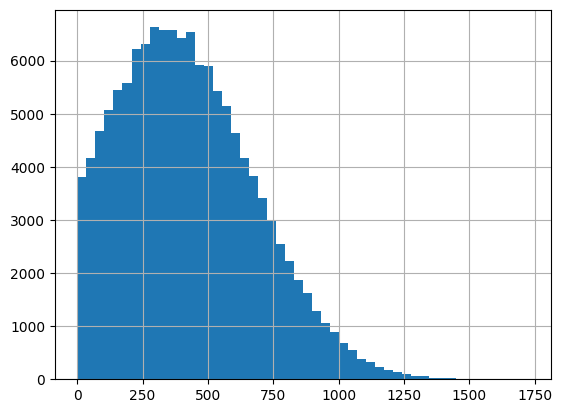

In [28]:
internet['mb_used'].hist(bins=50)

In [29]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [30]:
users.groupby('city').size()

city
Архангельск    1
Астрахань      4
Балашиха       5
Барнаул        3
Белгород       2
              ..
Челябинск      9
Череповец      3
Чита           4
Якутск         3
Ярославль      3
Length: 76, dtype: int64

In [31]:
users.pivot_table(index='city', values='user_id', aggfunc='count')

,user_id
city,
Архангельск,1
Астрахань,4
Балашиха,5
Барнаул,3
Белгород,2
...,...
Челябинск,9
Череповец,3
Чита,4


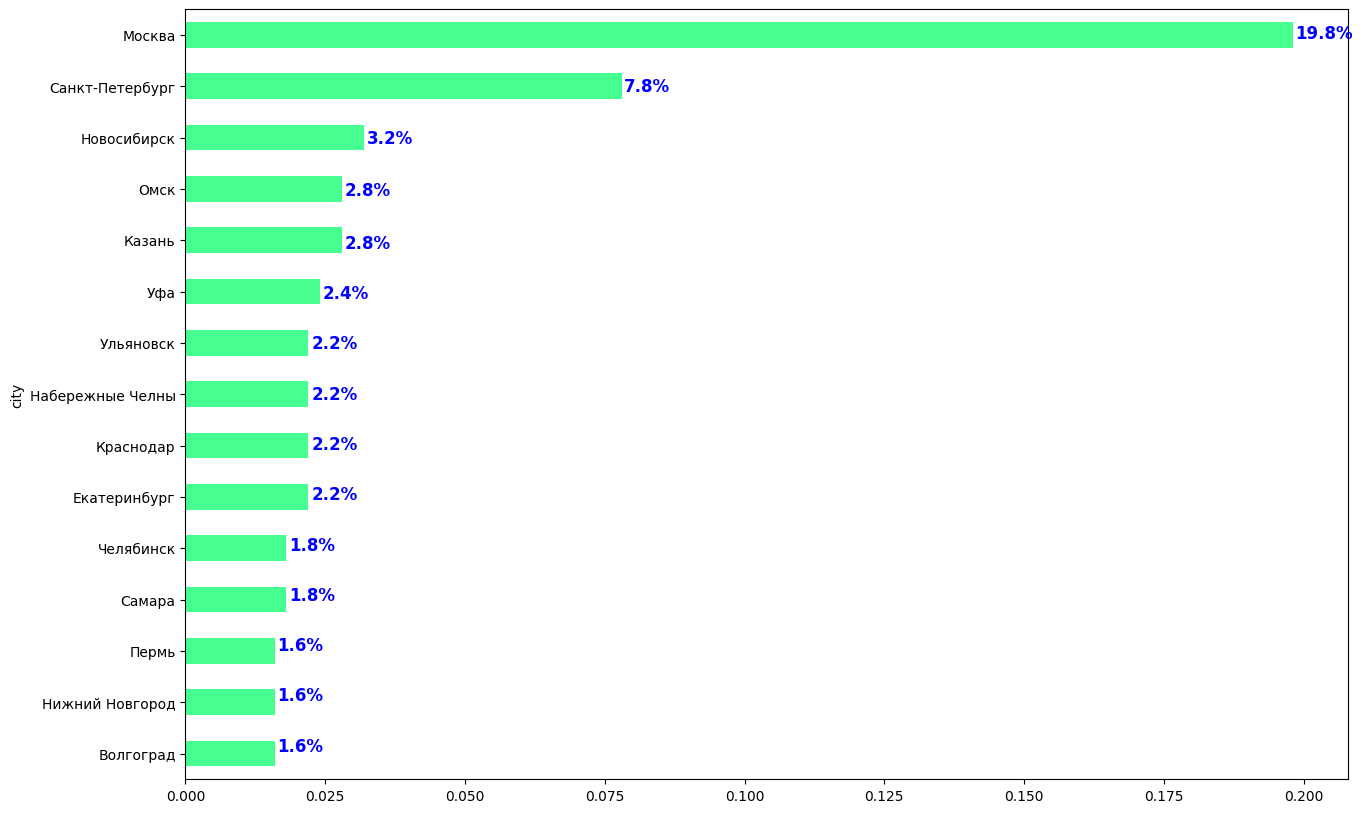

In [32]:
all_users = len(users)
df_for_barh = users.groupby('city').size()/all_users
df_for_barh_filtered = df_for_barh[df_for_barh > 0.015].sort_values()
ax = df_for_barh_filtered.plot(kind='barh', color='#45ff91', figsize=(15,10))

labels = dict(df_for_barh_filtered)
labels

i = 0
for city in labels:
    ax.text(labels[city] + 0.0005, i + 0.05, str(round(labels[city]*100, 6)) + '%', 
            fontsize = 'large', fontweight='bold', color='blue')
    if i < 9.7:
        i += 0.98
    else:
        i += 1.02

In [34]:
import requests as r
#list_of_cities = users['city'].unique().tolist()

#url = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey=6917c6b1-3019-4d9c-bf87-1a6a110530fc&geocode='
#coordinates = []

#for city in list_of_cities:
    if city == city: # чтоб не столкнуться с nan
        url_formatted = url + city
        rsp = r.get(url_formatted).json()
        data = rsp['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
        coordinate = (float(data.split()[1]), float(data.split()[0]))
        coordinates.append(coordinate)
    else:
        coordinates.append('')

IndentationError: unexpected indent (136918640.py, line 8)

In [35]:
unique_cities_coordinates = pd.DataFrame({'City':list_of_cities, 'Coordinates':coordinates})
unique_cities_coordinates.head(10)
dict_unique_cities_coord = dict(pd.Series(unique_cities_coordinates['Coordinates'].values, index=pd.Series(unique_cities_coordinates['City'].values)))

NameError: name 'list_of_cities' is not defined

In [36]:
users['coordinates'] = users['city'].map(dict_unique_cities_coord)
users[['city','coordinates']]

NameError: name 'dict_unique_cities_coord' is not defined

<h2>Посчитайте для каждого пользователя: <ol>
    <li>количество сделанных звонков и израсходованных минут разговора по месяцам;</li>
<li>количество отправленных сообщений по месяцам;</li>
<li>объем израсходованного интернет-трафика по месяцам;</li>
<li>помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).</li></ol></h2>

In [38]:
users['unique_name'] = users['city'] + ' ' + users['first_name'] + ' ' +  users['last_name']

In [39]:
users['unique_name']

0         Краснодар Рафаил Верещагин
1                   Москва Иван Ежов
2      Стерлитамак Евгений Абрамович
3              Москва Белла Белякова
4       Новокузнецк Татьяна Авдеенко
                   ...              
495          Иркутск Авксентий Фокин
496            Вологда Трифон Блохин
497        Челябинск Каролина Агеева
498     Владикавказ Всеволод Акимчин
499            Пермь Гектор Корнилов
Name: unique_name, Length: 500, dtype: object

In [40]:
calls_merge = calls.merge(users, on='user_id', how='inner')
calls_pivot = calls_merge.pivot_table(index=['user_id', 'month'], 
                                      values=['duration', 'unique_name'], 
                                      aggfunc={'unique_name':'count', 'duration':'sum'})
calls_pivot.columns = ['duration', 'calls']
calls_pivot

duration  calls
user_id month                 
1000    5         159.0     22
        6         172.0     43
        7         340.0     47
        8         408.0     52
        9         466.0     58
...                 ...    ...
1498    10        247.0     41
1499    9          70.0      9
        10        449.0     68
        11        612.0     74
        12        492.0     69

[3174 rows x 2 columns]

In [41]:
messages['month'] = messages['message_date'].dt.month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [42]:
messages_merge = messages.merge(users, on='user_id', how='inner')
message_pivot = messages_merge.pivot_table(values='unique_name', 
                       index=['user_id', 'month'], 
                       aggfunc={'unique_name': 'count'})
message_pivot.columns = ['messages']

In [43]:
message_pivot

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

In [44]:
internet['month'] = internet['session_date'].dt.month
internet_merge = internet.merge(users, on='user_id', how='inner')
internet_pivot = internet_merge.pivot_table(values = 'mb_used', 
                                            index=['user_id', 'month'],
                                            aggfunc={'mb_used': 'sum'})

In [45]:
data_frames = [calls_pivot, message_pivot, internet_pivot]
data_frames

[               duration  calls
 user_id month                 
 1000    5         159.0     22
         6         172.0     43
         7         340.0     47
         8         408.0     52
         9         466.0     58
 ...                 ...    ...
 1498    10        247.0     41
 1499    9          70.0      9
         10        449.0     68
         11        612.0     74
         12        492.0     69
 
 [3174 rows x 2 columns],
                messages
 user_id month          
 1000    5            22
         6            60
         7            75
         8            81
         9            57
 ...                 ...
 1498    10           42
 1499    9            11
         10           48
         11           59
         12           66
 
 [2717 rows x 1 columns],
                mb_used
 user_id month         
 1000    5       2256.0
         6      23257.0
         7      14016.0
         8      14070.0
         9      14581.0
 ...                ...
 1498    10

In [46]:
import functools
grouped = functools.reduce(lambda x, y:pd.merge(x,y, on=['user_id', 'month'], how='outer'), data_frames)

In [47]:
grouped.head(10)

duration  calls  messages  mb_used
user_id month                                    
1000    5         159.0   22.0      22.0   2256.0
        6         172.0   43.0      60.0  23257.0
        7         340.0   47.0      75.0  14016.0
        8         408.0   52.0      81.0  14070.0
        9         466.0   58.0      57.0  14581.0
        10        350.0   57.0      73.0  14717.0
        11        338.0   43.0      58.0  14768.0
        12        333.0   46.0      70.0   9827.0
1001    11        430.0   59.0       NaN  18452.0
        12        414.0   63.0       NaN  14053.0

In [48]:
grouped.loc[grouped['duration'].isna(), 'duration'] = 0
grouped.loc[grouped['messages'].isna(), 'messages'] = 0
grouped.loc[grouped['mb_used'].isna(), 'mb_used'] = 0

for user in grouped.index:
    grouped.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

def compound_revenue(row):
    #messages = row['messages']
    #mb_used = row['mb_used']
    #tariff = row['tariff']
    #duration = row['duration']
    #calls = row['calls']
    
    if row['tariff'] == 'smart':
        extra_duration = row['duration'] - tariffs.loc[0, 'minutes_included']
        extra_mb = row['mb_used'] - tariffs.loc[0, 'mb_per_month_included']
        extra_messages = row['messages'] - tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[0, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    elif row['tariff'] == 'ultra':
        extra_duration = row['duration'] - tariffs.loc[1, 'minutes_included']
        extra_mb = row['mb_used'] - tariffs.loc[1, 'mb_per_month_included']
        extra_messages = row['messages'] - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: extra_duration = 0
        if extra_mb < 0: extra_mb = 0
        if extra_messages < 0: extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   (tariffs.loc[1, 'rub_per_gb'] / 1024) * extra_mb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

grouped['revenue'] = grouped.apply(compound_revenue, axis=1)
grouped.head(10)

duration  calls  messages  mb_used tariff     revenue
user_id month                                                       
1000    5         159.0   22.0      22.0   2256.0  ultra  1950.00000
        6         172.0   43.0      60.0  23257.0  ultra  1950.00000
        7         340.0   47.0      75.0  14016.0  ultra  1950.00000
        8         408.0   52.0      81.0  14070.0  ultra  1950.00000
        9         466.0   58.0      57.0  14581.0  ultra  1950.00000
        10        350.0   57.0      73.0  14717.0  ultra  1950.00000
        11        338.0   43.0      58.0  14768.0  ultra  1950.00000
        12        333.0   46.0      70.0   9827.0  ultra  1950.00000
1001    11        430.0   59.0       0.0  18452.0  smart  1153.90625
        12        414.0   63.0       0.0  14053.0  smart   550.00000

In [49]:
median = grouped.pivot_table(index='user_id', values=['duration', 'calls', 'messages', 'mb_used'], aggfunc='median')
median

,calls,duration,mb_used,messages
user_id,,,,
1000,46.5,339.0,14325.5,65.0
1001,61.0,422.0,16252.5,0.0
1002,33.0,214.0,17601.0,11.0
1003,108.0,824.0,11368.0,83.0
1004,21.5,132.5,17828.5,154.5
...,...,...,...,...
1495,129.0,954.0,29393.0,82.0
1496,73.5,524.0,24067.5,41.5
1497,66.0,490.0,14174.0,17.0


In [50]:
#user_statistics = grouped.pivot_table(index='user_id', values=['duration', 'calls', 'messages', 'mb_used'], aggfunc=[np.std, np.var, np.median])

In [51]:
#user_statistics

NameError: name 'user_statistics' is not defined

In [52]:
user_statistics = grouped.pivot_table(index='user_id', 
                                       values=['duration', 'calls', 'messages', 'mb_used'], 
                                       aggfunc={'duration': [np.std, np.var, np.median],
                                                'calls': [np.std, np.var, np.median],
                                                'messages': [np.std, np.var, np.median],
                                                'mb_used': [np.std, np.var, np.median]})

In [53]:
for user_id in users['user_id']:
    median.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
    
median.dropna(subset=['duration'], inplace=True)
tariff_statistics = median.pivot_table(index=['tariff'], values=['duration', 'mb_used', 'messages'], 
                    aggfunc={'duration': [np.median, np.var, np.std], 
                             'mb_used': [np.median, np.var, np.std], 
                             'messages': [np.median, np.var, np.std]})
tariff_statistics


duration                            mb_used                             \
         median         std           var   median          std           var   
tariff                                                                          
smart    439.75  160.266622  25685.390127  16948.0  4179.542704  1.746858e+07   
ultra    535.25  303.793641  92290.576519  19750.5  8901.168701  7.923080e+07   

       messages                          
         median        std          var  
tariff                                   
smart      28.5  28.010653   784.596662  
ultra      47.5  49.236809  2424.263318

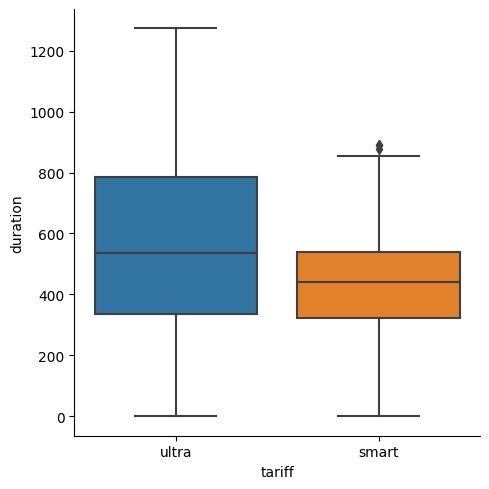

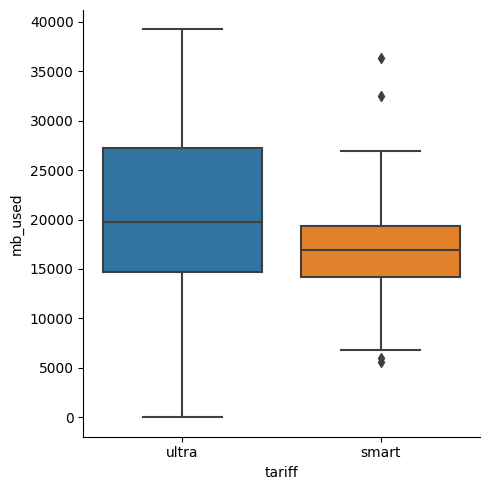

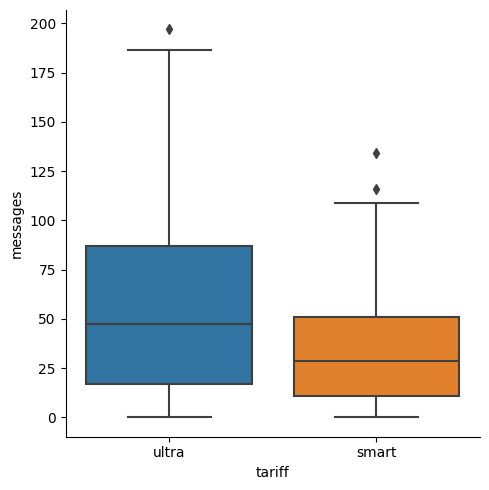

In [54]:
for column in ['duration', 'mb_used', 'messages']:    
    sns.catplot(x="tariff", y=column, kind="box", data=median, orient='v')

In [64]:
import scipy as sp
smart = grouped.query('tariff == "smart"')['revenue']
ultra = grouped.query('tariff == "ultra"')['revenue']
a = 0.05
t_test = sp.stats.ttest_ind(smart, ultra, equal_var=False)
if t_test.pvalue < a:
    print('H0 can be be rejected')
else: print('H0 can not be rejected')

H0 can not be rejected


In [65]:
t_test.pvalue

8.931402711368788e-296

In [66]:
grouped.pivot_table(index='tariff', values='revenue', aggfunc='mean')

,revenue
tariff,
smart,1233.349467
ultra,2060.529971


<h2> With that we can postulate, with a 95% probability, that the revenue, that the company gets from clients using ultra-tariff differs from that of smart-tariff clients, moreover, the company receives almost twice as much revenue from the clients, that use ultra-tariff<h2>

In [70]:
for user in grouped.index:
    grouped.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

moscow = grouped.query('city == "Москва"')['revenue']
regions = grouped.query('city != "Москва"')['revenue']

t_test2 = sp.stats.ttest_ind(moscow, regions, equal_var=False)
if t_test2.pvalue < a:
    print('H0 can be rejected')
else: print('H0 can not be rejected')

H0 can not be rejected


In [71]:
t_test2.pvalue


0.4549775646471024

In [99]:

#grouped['region'] = ['Москва' for i in grouped['region'] if city == 'Москва' else 'Регион']#grouped.query('city == "Москва"')
def city(city):
    if city == 'Москва':
        return 'Moscow'
    else: 
        return 'Region'

grouped['region'] = grouped['city'].apply(city)
moscow_pivot = grouped.pivot_table(index='region', values='revenue', aggfunc='mean')

In [100]:
moscow_pivot

,revenue
region,
Moscow,1507.276762
Region,1482.063727


In [96]:

moscow_pivot_median = grouped.pivot_table(index='region', values='revenue', aggfunc='median')
moscow_pivot_median

,revenue
region,
Moscow,1704.632812
Region,1518.078125


<h2>With this we can conclude, with the probability of 95 percent, that the revenue in Moscow and in region do not differ<h2>

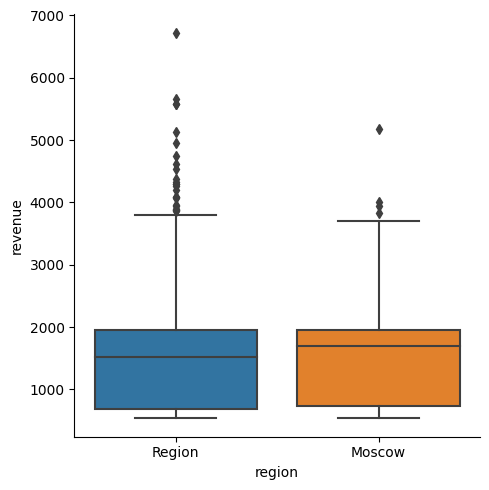

In [98]:
sns.catplot(x="region", y='revenue', kind="box", data=grouped, orient='v')
    
    

In [84]:
grouped

duration  calls  messages  mb_used tariff      revenue  \
user_id month                                                           
1000    5         159.0   22.0      22.0   2256.0  ultra  1950.000000   
        6         172.0   43.0      60.0  23257.0  ultra  1950.000000   
        7         340.0   47.0      75.0  14016.0  ultra  1950.000000   
        8         408.0   52.0      81.0  14070.0  ultra  1950.000000   
        9         466.0   58.0      57.0  14581.0  ultra  1950.000000   
...                 ...    ...       ...      ...    ...          ...   
1489    9           0.0    NaN      32.0  17232.0  smart   915.625000   
        10          0.0    NaN      21.0  19588.0  smart  1375.781250   
        11          0.0    NaN      20.0  17516.0  smart   971.093750   
        12          0.0    NaN      35.0  17341.0  smart   936.914062   
1476    4           0.0    NaN       0.0    531.0  ultra  1950.000000   

                          city  region  
user_id month                           
1000    5            Краснодар  region  
        6            Краснодар  region  
        7            Краснодар  region  
        8            Краснодар  region  
        9            Краснодар  region  
...                        ...     ...  
1489    9      Санкт-Петербург  region  
        10     Санкт-Петербург  region  
        11     Санкт-Петербург  region  
        12     Санкт-Петербург  region  
1476    4               Москва  Moscow  

[3214 rows x 8 columns]